# Architectures of Convolutional Network Models
***

### 1. Importing and Installing Packages
***

In [ ]:
! pip install visualkeras

import visualkeras
import tensorflow as tf
from matplotlib import pyplot as plt

### 2. Viewing Convolutional Network Architectures
***

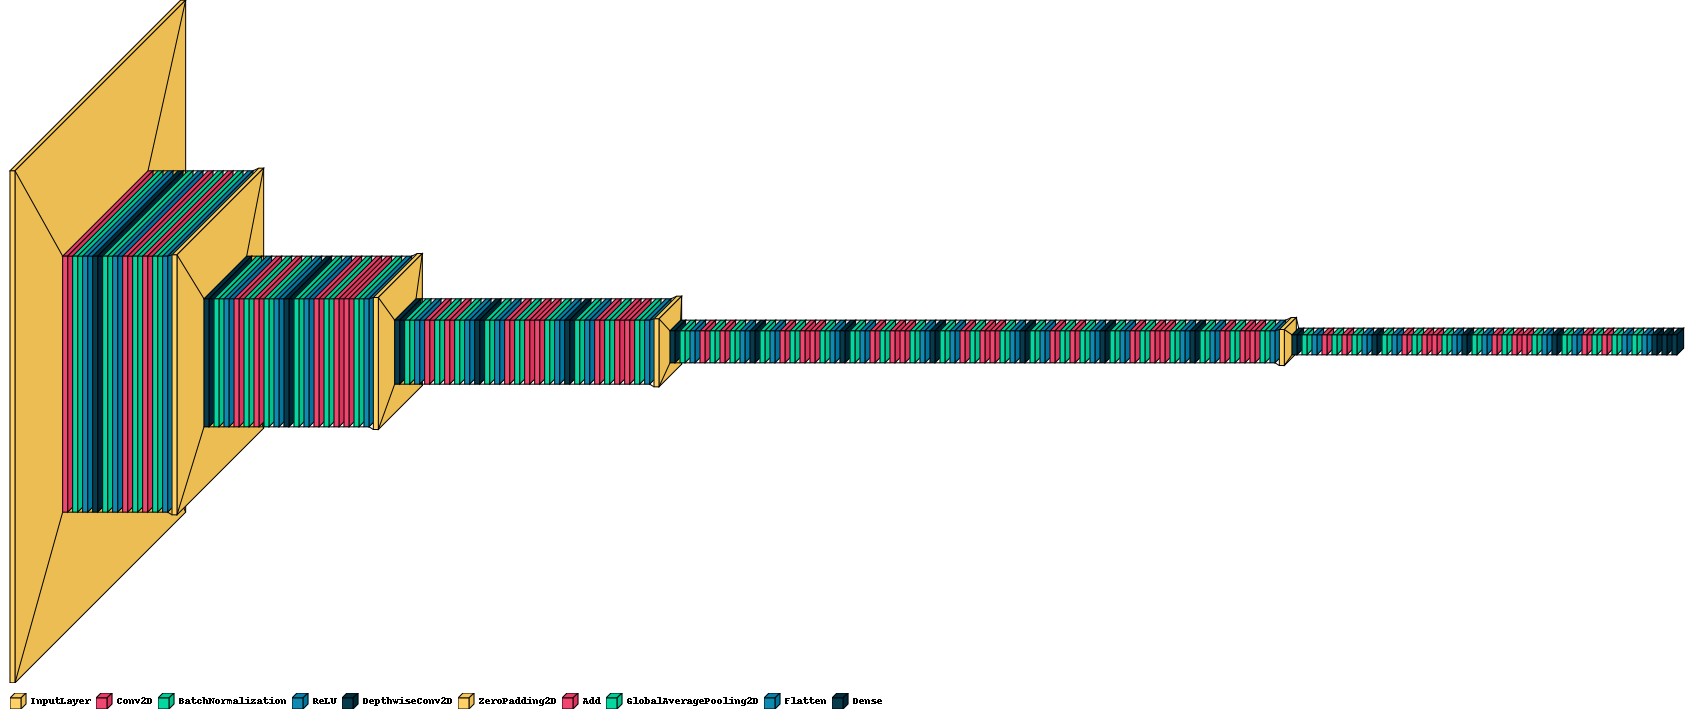

In [30]:
conv_base = tf.keras.applications.MobileNetV2(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

layers_name = list()
for layer in conv_base.layers:
  layers_name.append(layer.name)

last_conv = conv_base.get_layer(layers_name[-1])
last_output = last_conv.output

x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 512, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dense(units = 256, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)(x)

bounding_box_regression_output = tf.keras.layers.Dense(units = 4)(x)
model = tf.keras.models.Model(conv_base.input,x) 

model.compile(optimizer = tf.keras.optimizers.SGD(momentum = 0.9), loss = 'mean_squared_error', metrics = ['acc'])

visualkeras.layered_view(model, legend = True, max_z = 5, spacing = 5)

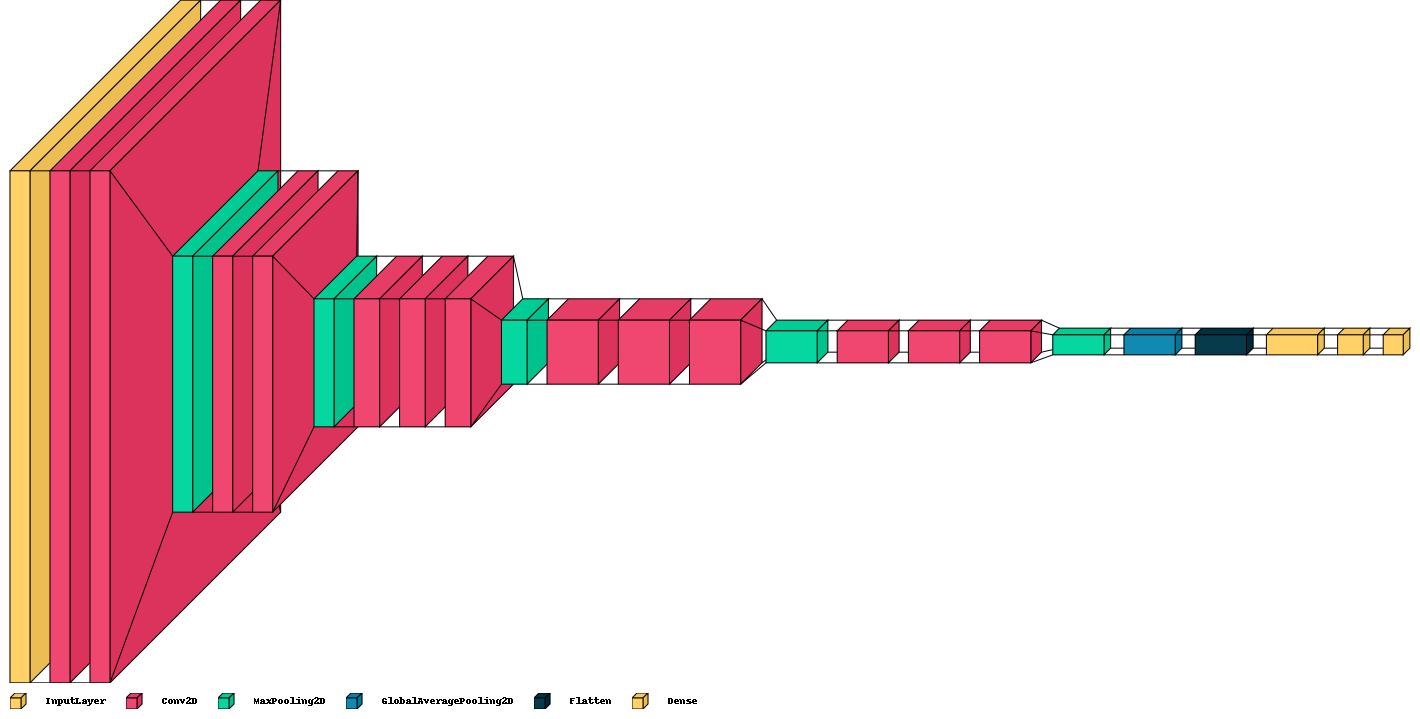

In [35]:
conv_base = tf.keras.applications.VGG16(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

layers_name = list()
for layer in conv_base.layers:
  layers_name.append(layer.name)

last_conv = conv_base.get_layer(layers_name[-1])
last_output = last_conv.output

x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units = 512, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dense(units = 256, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dense(units = 64, activation = tf.nn.relu)(x)

bounding_box_regression_output = tf.keras.layers.Dense(units = 4)(x)
model = tf.keras.models.Model(conv_base.input,x) 

model.compile(optimizer = tf.keras.optimizers.SGD(momentum = 0.9), loss = 'mean_squared_error', metrics = ['acc'])

visualkeras.layered_view(model, legend = True, max_z = 400, spacing = 20)